Q-1.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import re

# Load the dataset
data = pd.read_csv("instagram_reach.csv")

# Separate the categorical and numerical columns
categorical_cols = ['USERNAME', 'Caption', 'Hashtags']
numerical_cols = ['Followers']

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(data[categorical_cols])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Preprocess 'Time since posted' column
data['Time_Since_posted'] = data['Time since posted'].apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)

# Concatenate the encoded features with the numerical columns
X = pd.concat([encoded_df, data[numerical_cols], data['Time_Since_posted']], axis=1)

# Split the dataset into input features (X) and target variables (y)
y_likes = data['Likes']
y_time_since_posted = data['Time_Since_posted']

# Split the data into training and testing sets for likes
X_train_likes, X_test_likes, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)

# Create and train the linear regression model for predicting likes
model_likes = LinearRegression()
model_likes.fit(X_train_likes, y_train_likes)

# Make predictions on the test set for likes
y_pred_likes = model_likes.predict(X_test_likes)

# Evaluate the model for likes
mse_likes = mean_squared_error(y_test_likes, y_pred_likes)
mae_likes = mean_absolute_error(y_test_likes, y_pred_likes)
print("Likes - Mean Squared Error:", mse_likes)
print("Likes - Mean Absolute Error:", mae_likes)

# Split the data into training and testing sets for time since posted
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X, y_time_since_posted, test_size=0.2, random_state=42)

# Create and train the linear regression model for predicting time since posted
model_time = LinearRegression()
model_time.fit(X_train_time, y_train_time)

# Make predictions on the test set for time since posted
y_pred_time = model_time.predict(X_test_time)

# Evaluate the model for time since posted
mse_time = mean_squared_error(y_test_time, y_pred_time)
mae_time = mean_absolute_error(y_test_time, y_pred_time)
print("Time Since Posted - Mean Squared Error:", mse_time)
print("Time Since Posted - Mean Absolute Error:", mae_time)


Likes - Mean Squared Error: 569.1148100667051
Likes - Mean Absolute Error: 18.883724960718947
Time Since Posted - Mean Squared Error: 0.00018247565722000601
Time Since Posted - Mean Absolute Error: 0.008308204910866212


Q-2. 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Split the dataset into input features (X) and target variable (y)
X = data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC',
          'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = data['NObeyesdad']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print(classification_report(y_test, y_pred_logreg))

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Accuracy:", accuracy_dtree)
print(classification_report(y_test, y_pred_dtree))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machines Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))


C:\Users\abhis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6784869976359338
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.89      0.85        56
      Normal_Weight       0.67      0.53      0.59        62
     Obesity_Type_I       0.59      0.53      0.55        78
    Obesity_Type_II       0.78      0.88      0.83        58
   Obesity_Type_III       0.81      1.00      0.89        63
 Overweight_Level_I       0.58      0.50      0.54        56
Overweight_Level_II       0.40      0.42      0.41        50

           accuracy                           0.68       423
          macro avg       0.67      0.68      0.67       423
       weighted avg       0.67      0.68      0.67       423

Decision Tree Accuracy: 0.9361702127659575
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.96      0.93        56
      Normal_Weight       0.89      0.87      0.88        62
     Obesity_Type_I       0.97      0.94      0.95

Q3

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
from scipy.stats import pearsonr

# Load the dataset
data = pd.read_json("News_Category_Dataset_v3.json", lines=True)

# Select the features or categories of data
selected_data = data[['headline', 'category', 'short_description']]

# Convert the selected data into a list of dictionaries
data_list = selected_data.to_dict('records')

# Given data
given_data = {
    "link": "https://www.huffpost.com/entry/virginia-thomas-agrees-to-interview-with-jan-6-panel_n_632ba0f2e4b09d8701bbe16d",
    "headline": "Virginia Thomas Agrees To Interview With Jan. 6 Panel",
    "category": "U.S. NEWS",
    "short_description": "Conservative activist Virginia Thomas, the wife of Supreme Court Justice Clarence Thomas, has agreed to participate in a voluntary interview with the House panel investigating the Jan. 6 insurrection.",
    "authors": "Eric Tucker and Mary Clare Jalonick, AP",
    "date": "2022-09-21"
}

# Create a DataFrame for the given data
given_df = pd.DataFrame([given_data])

# Concatenate the given data with the dataset
combined_data = pd.concat([selected_data, given_df], ignore_index=True)

# Apply TF-IDF vectorization to the combined data
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(combined_data['headline'])

# Get the vector representation of the given data
given_vector = vectors[-1]

# Calculate the similarity scores using different algorithms
cosine_sim_scores = cosine_similarity(given_vector, vectors[:-1]).flatten()
euclidean_distances = [distance.euclidean(given_vector.toarray().flatten(), vec.toarray().flatten()) for vec in vectors[:-1]]
pearson_correlation = [pearsonr(given_vector.toarray().flatten(), vec.toarray().flatten())[0] for vec in vectors[:-1]]

# Print the similarity scores
print("Cosine Similarity Scores:")
print(cosine_sim_scores)
print("Euclidean Distances:")
print(euclidean_distances)
print("Pearson Correlation Coefficients:")
print(pearson_correlation)


C:\Users\abhis\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Cosine Similarity Scores:
[0.         0.         0.         ... 0.         0.         0.01179082]
Euclidean Distances:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Q4

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Preprocess the data
data = pd.read_csv('online_shoppers_intention.csv')  # Replace 'your_dataset.csv' with the actual dataset filename

# Handle missing values
data = data.dropna()  # Remove rows with missing values, or use imputation techniques

# Encode categorical variables
data = pd.get_dummies(data, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'])

# Step 2: Split the data
X = data.drop(['Revenue'], axis=1)
y = data['Revenue']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose an ensemble learning algorithm
ensemble_model = RandomForestClassifier()

# Step 5: Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: Make predictions
# Replace the values with the actual input values to make predictions
input_data = pd.DataFrame({
    'Administrative': [5],
    'Administrative_Duration': [100],
    'Informational': [2],
    'Informational_Duration': [50],
    'ProductRelated': [10],
    'ProductRelated_Duration': [200],
    'BounceRates': [0.2],
    'ExitRates': [0.4],
    'PageValues': [15],
    'SpecialDay': [0],
    'Month_Jan': [0],
    'Month_Feb': [1],
    'OperatingSystems_1': [0],
    'OperatingSystems_2': [1],
    'Browser_1': [0],
    'Browser_2': [1],
    'Region_1': [0],
    'Region_2': [1],
    'TrafficType_1': [0],
    'TrafficType_2': [1],
    'VisitorType_New_Visitor': [0],
    'VisitorType_Returning_Visitor': [1],
    'Weekend': [1]
})


Accuracy: 0.889294403892944


Q5

Mean Squared Error: 76.7708955264779


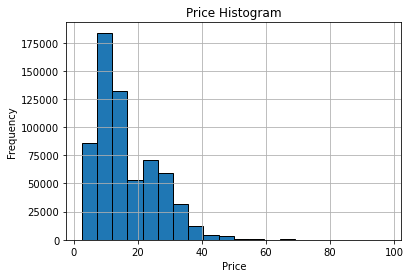

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Data Preparation
data = pd.read_csv("rideshare_kaggle.csv")

# Step 2: Data Exploration
#print(data.head())

# Step 3: Data Preprocessing

# Drop longitude and latitude columns
data = data.drop(['longitude', 'latitude'], axis=1)

# Drop rows with missing values
data = data.dropna()

# Step 4: Data Encoding

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']
for column in categorical_columns:
    if data[column].dtype == object:
        data[column] = label_encoder.fit_transform(data[column])

# Step 5: Unsupervised Learning (K-means Clustering)

# Select features for clustering
features = ['hour', 'day', 'month', 'distance']

# Perform clustering with K-means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Step 6: Data Visualization (Map Function)

# Choose a categorical column representing locations or areas
location_column = 'source'

# ... Map function code ...

# Step 7: Supervised Learning (Price Prediction)

# Select features for price prediction
price_features = ['hour', 'day', 'month', 'distance', 'cluster']

# Split the data into features and target
X = data[price_features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the prices for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 8: Visualization (Price Histogram)

# Plot a histogram of price
plt.hist(data['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.grid(True)

# Display the histogram
plt.show()


Q6:https://github.com/chetna-978/mlprojectq6.git

Q7

In [1]:
!pip install flask scikit-learn


In [ ]:
from flask import Flask, jsonify
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

app = Flask(__name__)

@app.route('/predict', methods=['GET'])
@app.route('/', methods=['GET'])
def index():
    return 'Welcome to the Music Genres Prediction API'

@app.route('/favicon.ico', methods=['GET'])
def favicon():
    return send_from_directory(os.path.join(app.root_path, 'static'), 'favicon.ico', mimetype='image/vnd.microsoft.icon')

def predict_genres():
    # Load the dataset
    data = pd.read_csv('data_2genre.csv')

    # Extract features for clustering
    features = data.drop(['filename', 'label'], axis=1)

    # Normalize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Apply clustering algorithm
    kmeans = MiniBatchKMeans(n_clusters=5, batch_size=100)  # Adjust the number of clusters and batch size as per your requirement
    predicted_labels = kmeans.fit_predict(scaled_features)

    # Add predicted labels to the dataset
    data['predicted_label'] = predicted_labels

    # Convert the result to JSON
    result = data[['filename', 'predicted_label']].to_dict(orient='records')

    return jsonify(result)

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Jun/2023 19:36:31] "GET / HTTP/1.1" 200 -


In [ ]:
from IPython.display import display, HTML

html_code = '''
<!DOCTYPE html>
<html>
<head>
  <title>Music Genres Prediction</title>
</head>
<body>
  <h1>Music Genres Prediction</h1>

  <div id="predictions"></div>

  <script>
    fetch('http://localhost:5000/predict')
      .then(response => response.json())
      .then(data => {
        const predictionsElement = document.getElementById('predictions');
        data.forEach(item => {
          const predictionItem = document.createElement('p');
          predictionItem.textContent = `${item.filename}: ${item.predicted_label}`;
          predictionsElement.appendChild(predictionItem);
        });
      })
      .catch(error => console.error('Error:', error));
  </script>
</body>
</html>
'''

display(HTML(html_code))

